In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from joblib import Parallel, delayed
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical



preprocessed_df = pd.read_csv('/content/drive/MyDrive/DDos_dataset.csv')
preprocessed_df.size

28898436

##Sampling

In [ ]:
clusters = preprocessed_df.groupby(' Label').groups.keys()
sample_size = 1

sampled_clusters = random.sample(list(clusters), sample_size)
sampled_data = pd.concat([preprocessed_df.loc[preprocessed_df[' Label'] == c] for c in sampled_clusters])
sampled_data.size

3873620

##Preprocessing

In [ ]:
def z_score(df):
  df_std = df.copy()
  for column in df_std.columns:
    if df_std[column].std() != 0:
      df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    else:
      df_std[column] = 0
  return df_std

def preprocess_data(data):
  normalized_df = z_score(data.loc[:, data.columns != ' Label'])
  normalized_df[' Label'] = data[' Label']

  train_df, test_df = train_test_split(normalized_df, test_size=0.15, shuffle=True)
  temp = train_df.loc[:, train_df.columns != ' Label']
  X_train = temp.to_numpy()
  y_train = train_df[' Label'].to_numpy()
  temp = test_df.loc[:, test_df.columns != ' Label']
  X_test = temp.to_numpy()
  y_test = test_df[' Label'].to_numpy()

preprocess_data(preprocessed_df)

##Random Forest Classifier

Accuracy: 0.8698134814187334
Precision:  0.8638985817481524
Recall:  0.8658921703971612
F1-score:  0.8522701501034807
Confusion Matrix:


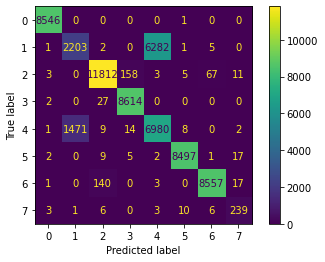

In [ ]:
# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Use the trained model to predict the test data
y_pred = rfc.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix_dis)

##SVM

In [ ]:
# Define SVM classifier
svm = SVC(kernel='rbf', C=1, decision_function_shape='ovr')

n_cores = 2
# Train the SVM model in parallel
svm_models = Parallel(n_jobs=n_cores)(delayed(svm.fit)(X_train, y_train) for i in range(n_cores))

# Predict the test set labels using each SVM model and take the majority vote
test_predictions = []
for model in svm_models:
    y_pred = model.predict(X_test)
    test_predictions.append(y_pred)
y_pred = [max(set(predictions), key=predictions.count) for predictions in zip(*test_predictions)]


# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
# conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix)

KeyboardInterrupt: ignored

##Logistic Regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8399767832211712
Precision:  0.8207654334713872
Recall:  0.7755609115973188
F1-score:  0.7857704737382991
Confusion Matrix:


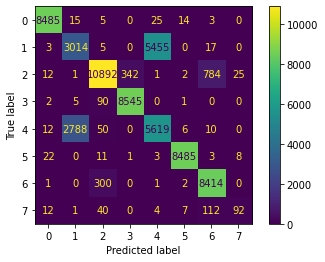

In [ ]:

# Create a logistic regression classifier with default parameters
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix_dis)

##KNN

Accuracy: 0.8649818815003059
Precision:  0.8524581499674448
Recall:  0.8604672738276755
F1-score:  0.8560741415104782
Confusion Matrix:
[[ 8536     0     0     0     0    10     1     0]
 [    2  4850     2     0  3635     0     5     0]
 [    4     1 11804   155    13     7    62    13]
 [    2     4    67  8555    13     1     0     1]
 [    1  4329    18     0  4127     8     1     1]
 [    9     1     9     0     8  8485     3    18]
 [    1     0   147     1     3     0  8546    20]
 [    4     1    12     1     1     6     6   237]]


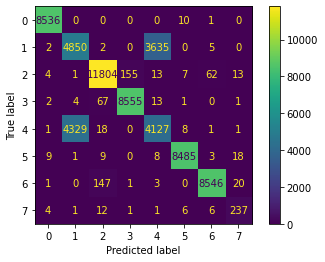

In [ ]:
# # Try different values of K
# k_values = list(range(1, 30))
# cv_scores = []

# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
#     cv_scores.append(scores.mean())
#     print(k)

# # Find the optimal value of K
# optimal_k = k_values[np.argmax(cv_scores)]
# print("Optimal K:", optimal_k)

# Create the KNN classifier with optimal_k
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix)
print(conf_matrix_dis)

##GMB

In [ ]:
# Define the model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(gbm, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix_dis)

KeyboardInterrupt: ignored

##PCA

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


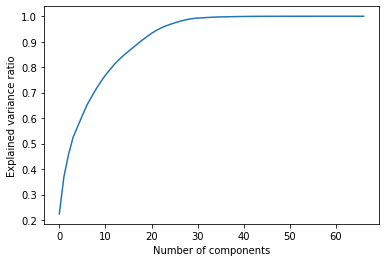

Accuracy: 0.8404395500964751
Precision:  0.8110520655381601
Recall:  0.7750825821780838
F1-score:  0.7829059018246737
Confusion Matrix:


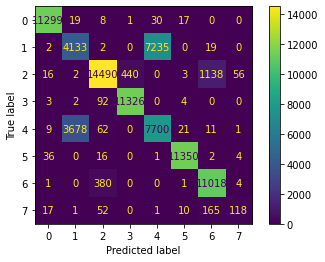

In [ ]:
# Split dataset into features and target variable
X = preprocessed_df.iloc[:, :-1].values
y = preprocessed_df.iloc[:, -1].values

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA to reduce the number of features
pca = PCA(n_components=X.shape[1])
X = pca.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix_dis)

##LSTM

In [ ]:
# Convert the target variable to categorical
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape the input data for the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_test = np.argmax(y_test, axis=1)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix)
print(conf_matrix_dis)

Accuracy: 0.8671466892559649
Precision:  0.8618780336731107
Recall:  0.8593876434061161
F1-score:  0.8479790833149217
Confusion Matrix:
[[ 8560     0     1     0     0     0     0     0]
 [    1  2211     1     0  6400     0     1     0]
 [    2     1 11841   166     2     7    95    10]
 [    3     0    15  8493     2     0     0     2]
 [    1  1488    10     6  7068     4     6     6]
 [    4     0    11     3     5  8466     2    25]
 [    1     2   131     0     2     0  8395     8]
 [    1     0    10     1     5    14    14   244]]
